In [2]:
## Data Balancing for Mobile sales Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [1]:
import pandas as pd
from pandas import read_excel
file_name = 'train.csv' 
df = pd.read_csv(file_name, index_col=0)
print(df.head()) # print the first 5 rows

               blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
battery_power                                                               
842               0          2.2         0   1       0           7    0.6   
1021              1          0.5         1   0       1          53    0.7   
563               1          0.5         1   2       1          41    0.9   
615               1          2.5         0   0       0          10    0.8   
1821              1          1.2         0  13       1          44    0.6   

               mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
battery_power                                                                  
842                  188        2   2         20       756  2549     9     7   
1021                 136        3   6        905      1988  2631    17     3   
563                  145        5   6       1263      1716  2603    11     2   
615                  131        6   9       1216      1786  

In [5]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "price_range"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(2000, 20)
(2000,)


In [6]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

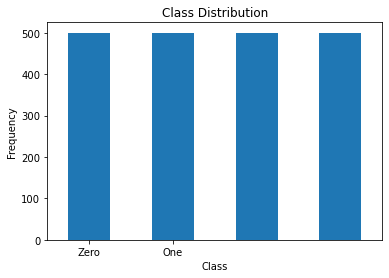

In [8]:
count_classes = pd.value_counts(df['price_range'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
One = df[df['price_range']==1]

Zero = df[df['price_range']==0]

In [10]:
print(One.shape)
print(Zero.shape)

(500, 20)
(500, 20)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

In [12]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from xgboost import XGBClassifier
#classifier = XGBClassifier(learning_rate=0.01,  subsample = 0.8, n_estimators=1000, max_depth=4, gamma=10)
model = XGBClassifier()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# predict the results

from sklearn.metrics import confusion_matrix, accuracy_score
#y_pred = clf.predict(X_test)
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100   0   0   0]
 [  0  99   0   0]
 [  0   0  96   0]
 [  0   0   0 105]]


1.0

In [15]:
##Oversampling Method

In [26]:
X = df[columns]
Y = df[target]

In [27]:
print(X.shape)
print(Y.shape)

(2000, 20)
(2000,)


In [29]:
One = df[df['price_range']==1]

Zero = df[df['price_range']==0]

print(Zero.shape,One.shape)

(500, 20) (500, 20)


In [31]:
pip install imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [32]:
!pip install imbalanced-learn

In [36]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
#y_pred = clf.predict(X_test)
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[100   0   0   0]
 [  0  99   0   0]
 [  0   0  96   0]
 [  0   0   0 105]]


1.0